## Import Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import normalize
from copy import deepcopy
from kmeans import *
iris = datasets.load_iris()
#X = iris.data
X = norm(iris.data)
y = iris.target

## KMeans.py

In [6]:
# kmeans.py

import numpy as np
from collections import Counter
from sklearn.metrics import f1_score, normalized_mutual_info_score

THRESHOLD = 1e-5

def norm(x):
    """
    >>> Function you should not touch
    """
    max_val = np.max(x, axis=0)
    x = x / max_val
    return x


def rand_center(data, k):
    """
    >>> Function you need to write
    >>> Select "k" random points from "data" as the initial centroids.
    """
    n_samples, n_features = np.shape(data)
    centroids = np.zeros((k, n_features))
    for i in range(k):
        centroid = data[np.random.choice(range(n_samples))]
        centroids[i] = centroid
    print(">>> initial centroids")
    print(centroids)
    return centroids


def converged(centroids1, centroids2):
    """
    >>> Function you need to write
    >>> check whether centroids1==centroids
    >>> add proper code to handle infinite loop if it never converges
    """
    diff = np.sum(np.abs(np.sum(centroids1 - centroids2, axis=1)), axis=0)
    if np.equal(centroids1, centroids2).all():
        return True
    elif diff < THRESHOLD:
        return True
    else:
        return False


def euclidean_dist(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2), axis=1))


def closest_centroid(val, centroids):
    return np.argmin(np.sqrt(np.sum(np.square(val - centroids), axis=1)))


def update_centroids(data, centroids, k=3):
    """
    >>> Function you need to write
    >>> Assign each data point to its nearest centroid based on the Euclidean distance
    >>> Update the cluster centroid to the mean of all the points assigned to that cluster
    """
    n_samples = np.shape(data)[0]
    n_features = np.shape(data)[1]
    clusters = [[] for _ in range(k)]
    labels = np.zeros((n_samples))

    for idx, val in enumerate(data):
        val_label = closest_centroid(val, centroids)
        clusters[val_label].append(val)
        labels[idx] = val_label
    centroids = np.zeros((k, n_features))
    for idx, cluster_val in enumerate(clusters):
        centroid = np.mean(cluster_val, axis=0)
        centroids[idx] = centroid
    return centroids, labels


def kmeans(data, k=3):
    """
    >>> Function you should not touch
    """
    # step 1:
    centroids = rand_center(data, k)
    converge = False
    iteration = 0
    while not converge:
        old_centroids = np.copy(centroids)
        # step 2 & 3
        centroids, label = update_centroids(data, old_centroids)
        # step 4
        converge = converged(old_centroids, centroids)
        iteration += 1
    print('number of iterations to converge: ', iteration)
    print(">>> final centroids")
    print(centroids)
    return centroids, label


def evaluation(predict, ground_truth):
    """
    >>> use F1 and NMI in scikit-learn for evaluation
    """
    f1 = f1_score(y_true=ground_truth, y_pred=predict, average='weighted')
    nmi = normalized_mutual_info_score(labels_true=ground_truth, labels_pred=predict)
    return f1, nmi


def gini(predict, ground_truth):
    """
    >>> use the ground truth to do majority vote to assign a flower type for each cluster
    >>> accordingly calculate the probability of missclassifiction and correct classification
    >>> finally, calculate gini using the calculated probabilities
    """
    labels = np.unique(ground_truth)
    num_labels = len(labels)
    cluster_p, cluster_g = [0 for _ in range(num_labels)], [0 for _ in range(num_labels)]
    gini_index = 0
    for i in labels:
        cluster_p[i], cluster_g[i] = np.array(predict[predict==i].shape[0]), np.array(ground_truth[ground_truth==i].shape[0])
        if cluster_p[i]<cluster_g[i]:
            correct_prob = cluster_p[i]/cluster_g[i]
            incorrect_prob = (cluster_g[i] - cluster_p[i])/cluster_g[i]
            gini_index += 1 - np.square(correct_prob) - np.square(incorrect_prob)
    gini_index /= num_labels
    print('Gini Index :', gini_index)
    return gini_index


def SSE(centroids, data):
    """
    >>> Calculate the sum of squared errors for each cluster
    """
    clusters = [[] for _ in centroids]
    num_centroids = len(centroids)
    for val in data:
        clusters[closest_centroid(val, centroids)].append(val)
    sse_each_cluster = [np.sum(np.sum(np.square(clusters[i] - centroids[i]), axis=1)) for i in range(num_centroids)]
    print('SSE_each_cluster: ', sse_each_cluster)
    return sse_each_cluster


def plot_result(model):
    fig = plt.figure(1, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=label.astype(np.float), edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title('3 clusters - {}'.format(model))
    ax.dist = 12

    plt.show()

## Q1

1. Run your own k-Means multiple times (at least 10 times) to find the best three
clustering based on SSE (sum of squared errors) and compare it with the result
obtained from k-Means in scikit-learn for comparison. Show both clustering
results using matplotlib.

>>> initial centroids
[[0.84810127 0.75       0.82608696 1.        ]
 [0.97468354 0.59090909 1.         0.92      ]
 [0.63291139 0.68181818 0.23188406 0.08      ]]
number of iterations to converge:  8
>>> final centroids
[[0.74853944 0.62237762 0.62263099 0.53      ]
 [0.84045359 0.68560606 0.80676329 0.8225    ]
 [0.63367089 0.77681818 0.21217391 0.0976    ]]
Gini Index : 0.025600000000000008
SSE_each_cluster:  [1.0302179676457113, 1.2157725785900486, 0.5860971086851517]


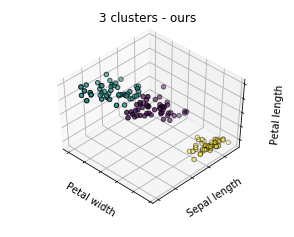

>>> initial centroids
[[0.83544304 0.65909091 0.66666667 0.52      ]
 [0.83544304 0.65909091 0.66666667 0.52      ]
 [0.60759494 0.77272727 0.27536232 0.08      ]]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

In [8]:
for _ in range(10):
    # this is the function you are supposed to implement in kmeans.py
    centroids, label = kmeans(X,3)
    # this is the function you are supposed to implement in kmeans.py
    evaluation(label, y)
    gini(label, y)
    SSE(centroids, X)
    plot_result('ours')

## Q2

2. Use the results obtained in (1) to explain why it's important to choose proper
initial centroids.



From the result of question 1 we can observe in one case that when we choose the initial centroids as :

```
[[0.62025316 0.70454545 0.2173913  0.04      ]
 [0.72151899 0.65909091 0.60869565 0.52      ]
 [0.60759494 0.68181818 0.20289855 0.04      ]]
```

the evaluation parameters we get are:

- Gini Index : 0.3285333333333333
- SSE_each_cluster:  
    - [0.21307645052258836, 5.538389212891668, 0.09732480213098582]
    
    
There is no feasible way to guarantee finding the optimal solution because the clustering analysis is a NP hard problem, so heuristics approaches are needed to get an outcome that's more likely to be optimal. So there's a chance that with poorly chosen initial centroids, the results might be suboptimal.

## Q3

3. Between the best clusterings you obtained via scikit-learn and your own k-Means
implementation, which clustering is better? Please make comparison in terms of
Impurity (Gini Index) of the clusterings. To compute. Gini Index for a clustering,
use the ground truth (i.e., flower types of data points) to do majority vote in order
to assign a flower type for each cluster. Accordingly, calculate the probability of
misclassification and correct classification. Finally, calculate Gini Index for a
clustering using the calculated probabilities.

### our Kmeans

>>> initial centroids
[[0.70886076 0.68181818 0.65217391 0.6       ]
 [0.6835443  0.68181818 0.65217391 0.6       ]
 [0.72151899 1.         0.2173913  0.16      ]]
number of iterations to converge:  6
>>> final centroids
[[0.84045359 0.68560606 0.80676329 0.8225    ]
 [0.74853944 0.62237762 0.62263099 0.53      ]
 [0.63367089 0.77681818 0.21217391 0.0976    ]]
Gini Index : 0.025600000000000008
SSE_each_cluster:  [1.2157725785900486, 1.0302179676457113, 0.5860971086851517]


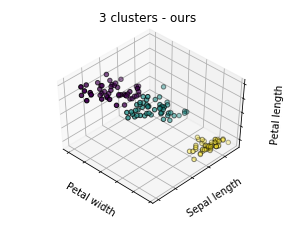

In [147]:
# this is the function you are supposed to implement in kmeans.py
centroids, label = kmeans(X,3)
# this is the function you are supposed to implement in kmeans.py
evaluation(label, y)
gini(label, y)
SSE(centroids, X)
plot_result('ours')

### sklearn

Gini Index : 0.025600000000000008


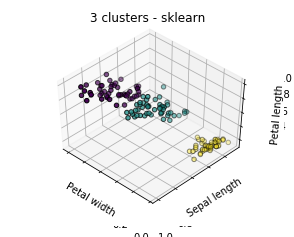

In [152]:
est = KMeans(n_clusters=3)
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
est.fit(X)
labels = est.labels_

# this is the function you are supposed to implement in kmeans.py
evaluation(labels, y)
gini(labels, y)
plot_result('sklearn')

### Discussion

Comparing the evaluation of our kmeans and the kmeans built in the sklearn package, the Gini Index of the best case in the 10 tests run with our kmeans is equivalent to the Gini Index calculated from sklearn. 



## Q4

4. In lab3.py, the data points are normalized (see line 12) by default as a data
preprocessing step. What happens if you use the raw data (line 11) without any
data preprocessing? Between normalized and unnormalized datasets, which one
obtains better clustering? Please make comparison in terms of Impurity (Gini
Index) of the clusterings and computational cost (number of iterations to
converge).

### un-normalize

In [158]:
X = iris.data

>>> initial centroids
[[7.1 3.  5.9 2.1]
 [6.  2.9 4.5 1.5]
 [6.5 3.  5.5 1.8]]
number of iterations to converge:  8
>>> final centroids
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Gini Index : 0.1216
SSE_each_cluster:  [23.87947368421052, 15.240400000000001, 39.82096774193548]


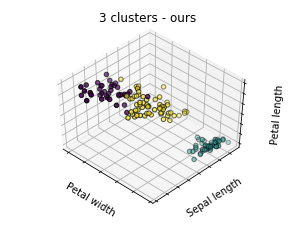

In [161]:
# this is the function you are supposed to implement in kmeans.py
centroids, label = kmeans(X,3)
# this is the function you are supposed to implement in kmeans.py
evaluation(label, y)
gini(label, y)
SSE(centroids, X)
plot_result('ours')

### normalize

In [162]:
X = norm(iris.data)

>>> initial centroids
[[0.73417722 0.61363636 0.73913043 0.76      ]
 [0.83544304 0.68181818 0.63768116 0.56      ]
 [0.70886076 0.65909091 0.52173913 0.52      ]]
number of iterations to converge:  5
>>> final centroids
[[0.84045359 0.68560606 0.80676329 0.8225    ]
 [0.74853944 0.62237762 0.62263099 0.53      ]
 [0.63367089 0.77681818 0.21217391 0.0976    ]]
Gini Index : 0.025600000000000008
SSE_each_cluster:  [1.2157725785900486, 1.0302179676457113, 0.5860971086851517]


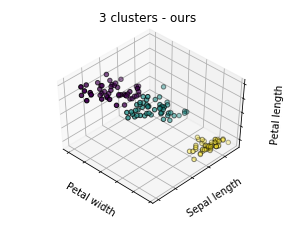

In [169]:
# this is the function you are supposed to implement in kmeans.py
centroids, label = kmeans(X,3)
# this is the function you are supposed to implement in kmeans.py
evaluation(label, y)
gini(label, y)
SSE(centroids, X)

plot_result('ours')

### Discussion

From the evaluation results, we can see that the normalized dataset obtains better clustering, reducing the Gini Index by approximately 0.096 from 0.1216 to 0.0256. And with regard to the computational cost, the number of iterations consumed to for the algorithm trained by unnormalized dataset to converge is 8 and the number of iterations for the algorithm trained by normalized dataset is 5 (_however by running the test for a few times, the numbers of iterations took for both unnormalized and normalized dataset to converge are mostly similar and not significantly different_)

## Q5

5. By comparing the clusterings in (3) and (4) against the ground truth, explain
whether Impurity is a reasonable quality measure for clustering?

### ground truth visualization

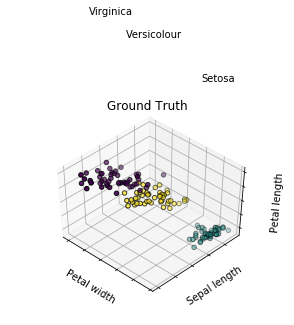

In [170]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()

### Discussion

Impurity is a reasonable quality measure for clustering from the clusterings we got from (3) and (4). Because:

- Impurity (in this case, the Gini Index could be used as evaluation criteria for the algorithm to determine its optimality:
    - in question 3, Gini Index is used for comparison of clusterings obtained between our KMeans and the one from sklearn package;
    - in question 4, Gini Index is used for comparison of clusterings obtained  between KMeans models trained with normalized and unnormalized dataset